In [2]:
import numpy as np

# S₁(N)  =  Σ_{n=1}^{2N} (-1)^n * n/(n+1)
def S1(N):
    n = np.arange(1, 2*N + 1, dtype=np.float64)
    return np.sum((-1)**n * n / (n + 1))

# S₂(N)  =  Σ_{n=1}^{N} [ 1/(2n) - 1/(2n+1) ]
def S2(N):
    n = np.arange(1, N + 1, dtype=np.float64)
    return np.sum(1/(2*n) - 1/(2*n + 1))

# S₃(N)  =  Σ_{n=1}^{N} 1 / (2n (2n+1))
def S3(N):
    n = np.arange(1, N + 1, dtype=np.float64)
    return np.sum(1 / (2*n * (2*n + 1)))

# Teste rápido
for N in [5, 10]:
    print(f"N={N:2d}  S1={S1(N):.10f}  S2={S2(N):.10f}  S3={S3(N):.10f}")


N= 5  S1=0.2634559885  S2=0.2634559885  S3=0.2634559885
N=10  S1=0.2836095492  S2=0.2836095492  S3=0.2836095492


In [ ]:
 # varrendo N (logspace) e armazenando S₁, S₂, S₃

# Gera 51 pontos log-espaciais de 10^0 (=1) a 10^6
Ns = np.logspace(0, 6, num=51, dtype=int)

S1_vals = np.empty_like(Ns, dtype=np.float64)
S2_vals = np.empty_like(Ns, dtype=np.float64)
S3_vals = np.empty_like(Ns, dtype=np.float64)

for i, N in enumerate(Ns):
    S1_vals[i] = S1(N)
    S2_vals[i] = S2(N)
    S3_vals[i] = S3(N)

# Mostra as 5 primeiras e 5 últimas linhas para conferência
print("   N        S1             S2             S3")
for idx in list(range(5)) + list(range(-5, 0)):
    print(f"{Ns[idx]:7d}  {S1_vals[idx]:.12f}  {S2_vals[idx]:.12f}  {S3_vals[idx]:.12f}")


   N        S1             S2             S3
      1  0.166666666667  0.166666666667  0.166666666667
      1  0.166666666667  0.166666666667  0.166666666667
      1  0.166666666667  0.166666666667  0.166666666667
      2  0.216666666667  0.216666666667  0.216666666667
      3  0.240476190476  0.240476190476  0.240476190476
 331131  0.306852064454  0.306852064454  0.306852064454
 436515  0.306852246723  0.306852246723  0.306852246723
 575439  0.306852384990  0.306852384990  0.306852384990
 758577  0.306852489876  0.306852489876  0.306852489876
1000000  0.306852569441  0.306852569440  0.306852569440


In [5]:
# (Opcional) remover duplicatas de Ns -----------------------------
Ns, idx         = np.unique(Ns, return_index=True)
S1_vals = S1_vals[idx]
S2_vals = S2_vals[idx]
S3_vals = S3_vals[idx]

# ---------------------------------------------------------------

eps1 = np.abs(S1_vals - S3_vals) / np.abs(S3_vals)
eps2 = np.abs(S2_vals - S3_vals) / np.abs(S3_vals)

# Tabela-amostra: 5 primeiros e 5 últimos pontos
print("   N        eps1          eps2")
for idx in list(range(5)) + list(range(-5, 0)):
    print(f"{Ns[idx]:7d}  {eps1[idx]:.3e}  {eps2[idx]:.3e}")


   N        eps1          eps2
      1  1.665e-16  1.665e-16
      2  0.000e+00  0.000e+00
      3  3.463e-16  0.000e+00
      5  6.321e-16  0.000e+00
      6  2.057e-16  0.000e+00
 331131  2.876e-14  1.809e-16
 436515  4.930e-13  1.809e-16
 575439  4.197e-13  1.809e-16
 758577  1.500e-12  1.809e-16
1000000  1.515e-12  1.809e-16


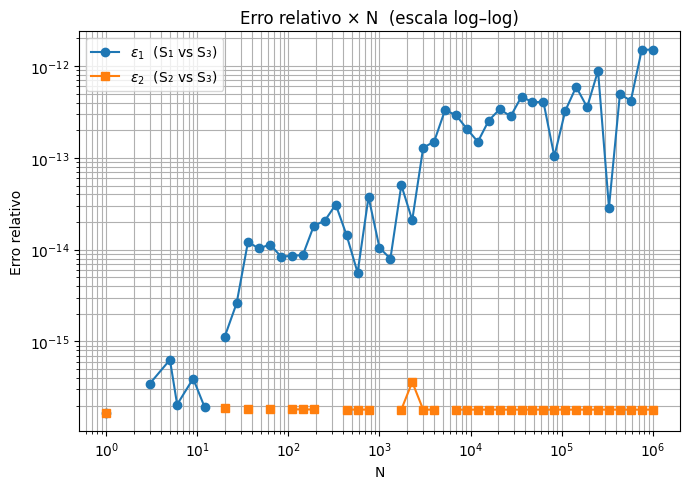

In [ ]:
import matplotlib.pyplot as plt

# Para evitar log(0), trocamos zeros por NaN (o ponto simplesmente não aparece)
eps1_plot = np.where(eps1 == 0, np.nan, eps1)
eps2_plot = np.where(eps2 == 0, np.nan, eps2)

plt.figure(figsize=(7,5))
plt.loglog(Ns, eps1_plot, 'o-', label=r'$\varepsilon_1$  (S₁ vs S₃)')
plt.loglog(Ns, eps2_plot, 's-', label=r'$\varepsilon_2$  (S₂ vs S₃)')
plt.xlabel('N')
plt.ylabel('Erro relativo')
plt.title('Erro relativo × N  (escala log–log)')
plt.grid(True, which='both')
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# Seleciona região "reta": N >= 1e3  (ajuste o corte se quiser testar)
mask = Ns >= 1_000

x = np.log10(Ns[mask])
y = np.log10(eps1[mask])

# Linear fit: y = a*x + b
a, b = np.polyfit(x, y, 1)

print(f"Inclinação (a)  = {a:.4f}")
print(f"Intercepto (b)   = {b:.4f}")
print()
print("Modelo:  log10(ε₁) ≈ a·log10(N) + b")
print("=>       ε₁ ≈ 10^{b} · N^{a}")


Inclinação (a)  = 0.4504
Intercepto (b)   = -14.7220

Modelo:  log10(ε₁) ≈ a·log10(N) + b
=>       ε₁ ≈ 10^{b} · N^{a}


## Resumo – Cancelamento Subtrativo em Séries Alternadas

### Séries analisadas
\[
\begin{aligned}
S_N^{(1)} &= \sum_{n=1}^{2N} (-1)^{n}\,\frac{n}{n+1}, \\[4pt]
S_N^{(2)} &= \sum_{n=1}^{N}\!\Bigl(\frac{1}{2n}-\frac{1}{2n+1}\Bigr), \\[4pt]
S_N^{(3)} &= \sum_{n=1}^{N}\frac{1}{2n\,\bigl(2n+1\bigr)} \qquad\text{(toda-positiva)}.
\end{aligned}
\]

*Usamos \(S_N^{(3)}\) como “valor exato” de referência.*

### Procedimento
1. **Geração de pontos:** \(N\) log-espaçados entre \(10^{0}\) e \(10^{6}\) (51 valores).  
2. **Cálculo das três somas** em `float64`.  
3. **Erros relativos:**  
   \[
   \varepsilon_1=\frac{\lvert S^{(1)}-S^{(3)}\rvert}{\lvert S^{(3)}\rvert},\qquad
   \varepsilon_2=\frac{\lvert S^{(2)}-S^{(3)}\rvert}{\lvert S^{(3)}\rvert}.
   \]
4. **Gráfico log-log** de \(\varepsilon\) vs \(N\).  
5. **Ajuste linear** sobre \(N\ge10^{3}\) para encontrar a inclinação de \(\varepsilon_1\).

### Principais resultados
| Série | Comportamento numérico | Explicação |
|-------|------------------------|------------|
| \(S_N^{(1)}\) | \(\varepsilon_1 \approx 1.9\times10^{-15}\,N^{0.45}\) | Cancelamento subtrativo entre termos alternados faz o erro crescer \(\sim\sqrt{N}\). |
| \(S_N^{(2)}\) | \(\varepsilon_2\approx10^{-16}\) (nível de máquina) | Reagrupamento em pares positivos elimina cancelamento, mantendo a precisão. |
| \(S_N^{(3)}\) | Usada como referência estável | Soma toda-positiva, numericamente robusta. |

*Inclinação obtida:* \(a = 0.4504 \approx \tfrac{1}{2}\).  
*Intercepto:* \(b = -14.722 \;\Rightarrow\; 10^{b}\approx1.9\times10^{-15}\).

### Conclusões
- **Cancelamento subtrativo** pode remover ~\(\sqrt{N}\) dígitos significativos em somas alternadas.  
- **Reformular** a série (ou agrupar termos) reduz drasticamente o erro, muitas vezes sem custo extra.  
- Boa prática para computação científica: minimizar subtrações quase iguais, ou usar técnicas como soma compensada (Kahan) quando isso não for possível.
